In [138]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,fbeta_score,classification_report

In [139]:
df=pd.read_csv("heart_disease_health.csv")
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [140]:
df.shape

(253680, 22)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [142]:
df.isnull().any()

HeartDiseaseorAttack    False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
Diabetes                False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

In [143]:
df.describe()


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [144]:
df["HeartDiseaseorAttack"].value_counts()
#so the data is unbalanced

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [145]:
cor_matrix = df.corr().abs()
cor_matrix

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,0.087299,0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,0.099600,0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,0.125267,0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,0.141358,0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,0.078046,0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,0.070802,0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,0.058255,0.046589,0.008366,0.031775,0.040585,0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,0.147294,0.087518,...,0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,0.036618,0.103932,0.100069
Smoker,0.114441,0.096991,0.091299,0.009929,0.013804,1.000000,0.061173,0.062914,0.087401,0.077666,...,0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,0.161955,0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,0.069151,0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,0.076009,0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,0.121947,0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,0.130517,0.171483
PhysActivity,0.087299,0.125267,0.078046,0.004190,0.147294,0.087401,0.069151,0.121947,1.000000,0.142756,...,0.035505,0.061638,0.266186,0.125587,0.219230,0.253174,0.032482,0.092511,0.199658,0.198539
Fruits,0.019790,0.040555,0.040859,0.023849,0.087518,0.077666,0.013389,0.042192,0.142756,1.000000,...,0.031544,0.044243,0.103854,0.068217,0.044633,0.048352,0.091175,0.064547,0.110187,0.079929


Text(0.5, 1.0, 'correlation of features')

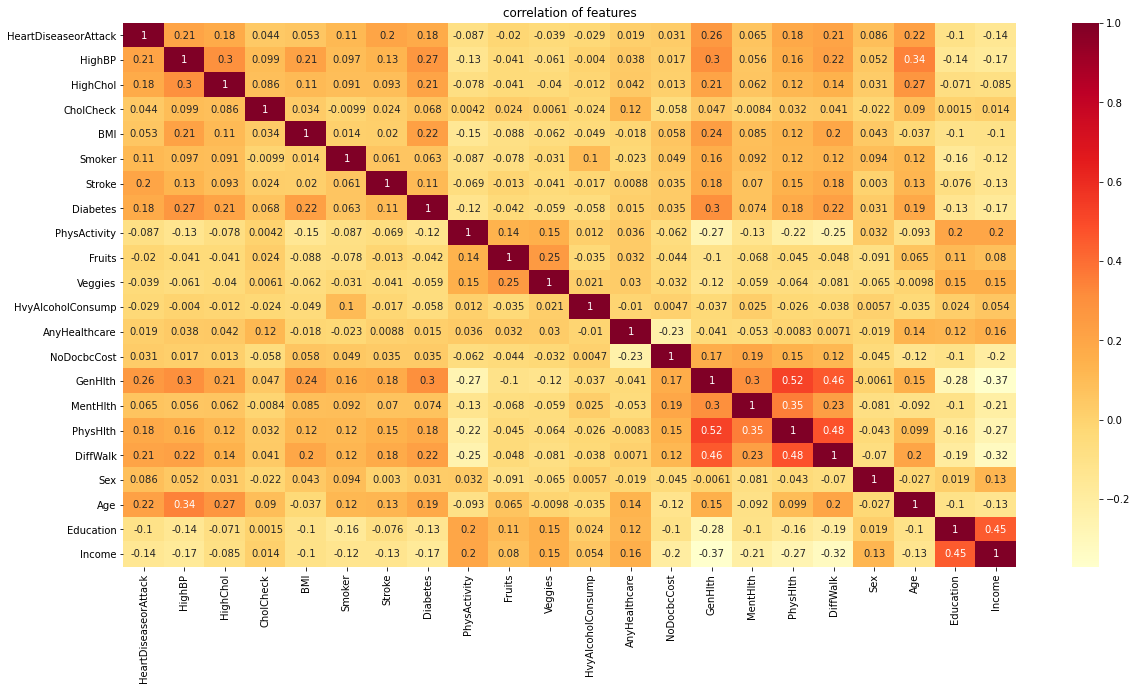

In [146]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),annot=True , cmap ='YlOrRd')
plt.title("correlation of features")

# Dark shades represents positive correlation while lighter shades represents negative correlation.

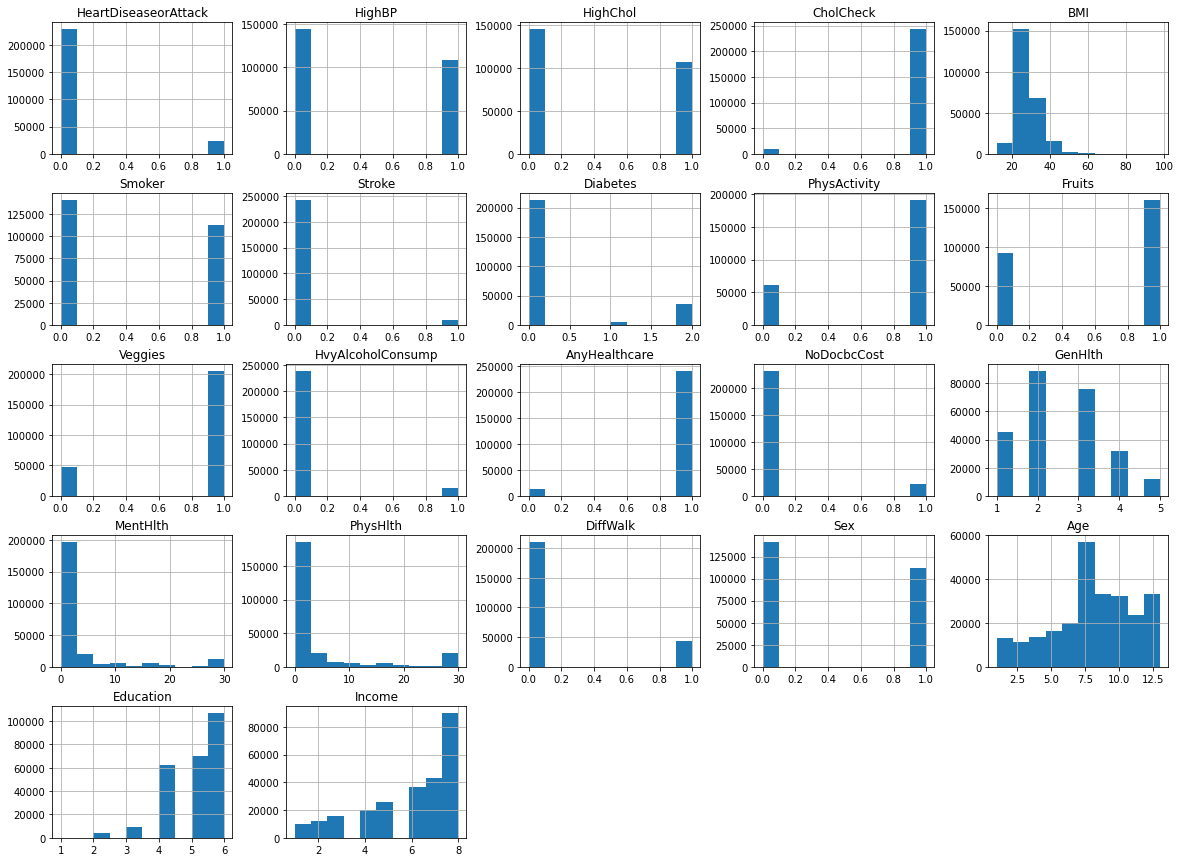

In [147]:
df.hist(figsize=(20,15));
#to get the feature that does not affect the data

In [148]:
df['Age'] = df['Age']*5
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,45.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,35.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,45.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,55.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,55.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,25.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,55.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,35.0,5.0,1.0


<AxesSubplot:xlabel='Age'>

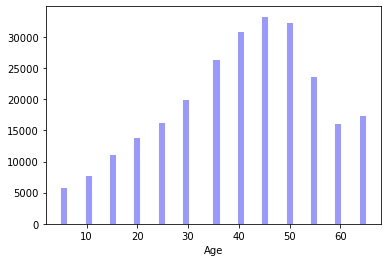

In [149]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df['Age'], kde=False, color='blue')

In [150]:
#some graphs to know the relation between data 

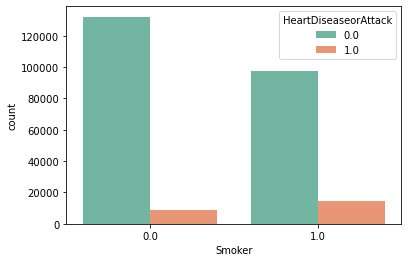

In [151]:
sns.countplot(x ='Smoker', hue = "HeartDiseaseorAttack", data = df , palette = "Set2")
plt.show()

<AxesSubplot:xlabel='Diabetes', ylabel='count'>

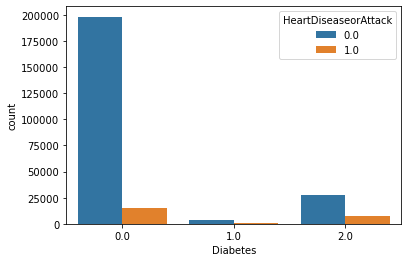

In [152]:
sns.countplot(x='Diabetes', data=df, hue='HeartDiseaseorAttack')


<AxesSubplot:xlabel='HighBP', ylabel='count'>

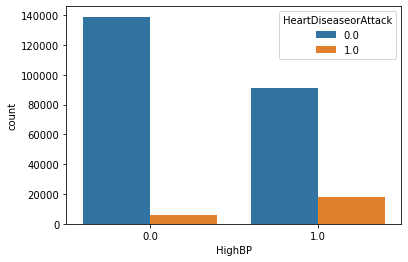

In [153]:
sns.countplot(x='HighBP', data=df, hue='HeartDiseaseorAttack')


<AxesSubplot:xlabel='HighChol', ylabel='count'>

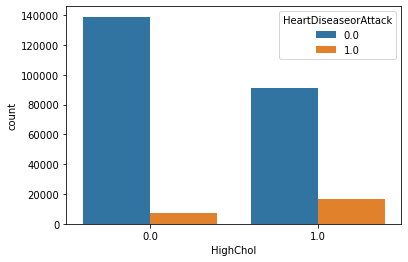

In [154]:
sns.countplot(x='HighChol', data=df, hue='HeartDiseaseorAttack')


<AxesSubplot:xlabel='Stroke', ylabel='count'>

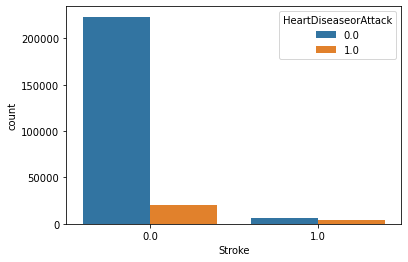

In [155]:
sns.countplot(x='Stroke', data=df, hue='HeartDiseaseorAttack')


<AxesSubplot:xlabel='GenHlth', ylabel='count'>

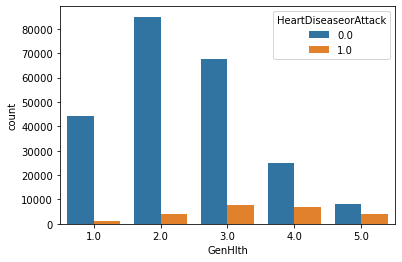

In [156]:
sns.countplot(x='GenHlth', data=df, hue='HeartDiseaseorAttack')


<AxesSubplot:xlabel='DiffWalk', ylabel='count'>

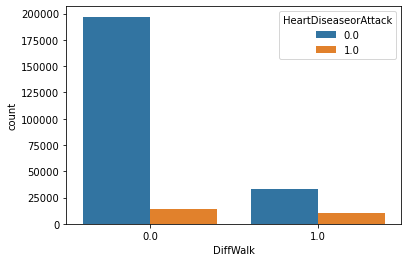

In [157]:
sns.countplot(x='DiffWalk', data=df, hue='HeartDiseaseorAttack')


In [158]:
df.drop(["AnyHealthcare"], axis=1 ,inplace=True)
df.drop(["NoDocbcCost"], axis=1 ,inplace=True)
df.drop(["HvyAlcoholConsump"], axis=1 ,inplace=True)
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,18.0,15.0,1.0,0.0,45.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,35.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,30.0,30.0,1.0,0.0,45.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,55.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,55.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,5.0,0.0,1.0,25.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,55.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,10.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,35.0,5.0,1.0


In [159]:
df.shape

(253680, 19)

In [160]:
df.loc[df.duplicated(), :]


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1234,0.0,0.0,0.0,1.0,20.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,50.0,6.0,8.0
1242,0.0,1.0,1.0,1.0,27.0,1.0,0.0,2.0,0.0,0.0,1.0,5.0,0.0,30.0,1.0,0.0,50.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,20.0,6.0,8.0
2408,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,30.0,6.0,6.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,25.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253563,0.0,0.0,1.0,1.0,24.0,1.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,40.0,6.0,8.0
253575,0.0,0.0,0.0,1.0,25.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,10.0,5.0,5.0
253597,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,25.0,6.0,8.0
253638,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,5.0,4.0,6.0


In [161]:
duplicated_rows = df[df.duplicated()]
print(f'we have {duplicated_rows.shape[0]} duplicated rows in our data.')

we have 27175 duplicated rows in our data.


In [162]:
df.drop_duplicates(inplace=True)
print(f'data shape after drop duplicated rows : {df.shape}')

data shape after drop duplicated rows : (226505, 19)


In [163]:
#split the unbalanced data

In [164]:
# over sampling of the dataset to get a balanced dataset
undisease = df[df['HeartDiseaseorAttack'] == 0]
disease = df[df['HeartDiseaseorAttack'] == 1]

disease_over = disease.sample(len(undisease), replace=True)

df1 = pd.concat([disease_over, undisease], axis=0)

df1['HeartDiseaseorAttack'].value_counts()

0.0    202803
1.0    202803
Name: HeartDiseaseorAttack, dtype: int64

# LogisticRegression model 

In [196]:
from sklearn.model_selection import train_test_split

x = df1.drop('HeartDiseaseorAttack', axis = 1) 
y = df1[['HeartDiseaseorAttack']] 

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 3 , test_size = 0.3)

In [197]:
LR=LogisticRegression()
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

train_pred = LR.predict(x_train)
test_pred = LR.predict(x_test)

train_score = metrics.accuracy_score( train_pred , y_train )
test_score = metrics.accuracy_score( test_pred , y_test)

# A confusion matrix is a table that is used to evaluate the performance of a classification model . 

In [198]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[44535, 16306],
       [13850, 46991]], dtype=int64)

# visualaization to cnf 

Text(0.5, 257.44, 'Predicted label')

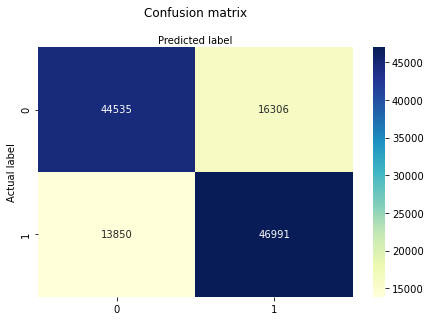

In [199]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
 #create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [200]:
#Precision Score = TP / (FP + TP)
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.742


In [201]:
train_score = metrics.accuracy_score( train_pred , y_train )
test_score = metrics.accuracy_score( test_pred , y_test )

In [202]:
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

F1 Score: 0.757


In [203]:
#Recall Score = TP / (FN + TP)
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.772


In [204]:
print("Train score -> ", train_score )
print("Test score -> " , test_score )

Train score ->  0.7517152477423535
Test score ->  0.7521736986571556


In [205]:
score = LR.score(x_train, y_train)
print(score)

0.7517152477423535


In [206]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.76      0.73      0.75     60841
         1.0       0.74      0.77      0.76     60841

    accuracy                           0.75    121682
   macro avg       0.75      0.75      0.75    121682
weighted avg       0.75      0.75      0.75    121682



# Random forest algorithm 

In [207]:
# over sampling of the dataset to get a balanced dataset
undisease = df[df['HeartDiseaseorAttack'] == 0]
disease = df[df['HeartDiseaseorAttack'] == 1]

disease_over = disease.sample(len(undisease), replace=True)

df1 = pd.concat([disease_over, undisease], axis=0)

df1['HeartDiseaseorAttack'].value_counts()

0.0    202803
1.0    202803
Name: HeartDiseaseorAttack, dtype: int64

In [208]:
from sklearn.model_selection import train_test_split

x = df1.drop('HeartDiseaseorAttack', axis = 1) 
y = df1[['HeartDiseaseorAttack']] 


x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 10 , test_size = 0.2)

In [209]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 20 , random_state = 10)
RF.fit(x_train, y_train)
RF.score(x_train,y_train)


0.9968411385461224

In [210]:
prediction_test = RF.predict(x_test)
prediction_train = RF.predict(x_train)


In [211]:
train_score = metrics.accuracy_score( prediction_train , y_train )
test_score = metrics.accuracy_score( prediction_test , y_test )
print("Train score -> ", train_score )
print("Test score -> " , test_score )

Train score ->  0.9968411385461224
Test score ->  0.9684056113014965


In [212]:
print('Precision: %.3f' % precision_score(y_test, prediction_test))

Precision: 0.941


In [213]:
print('Recall: %.3f' % recall_score(y_test, prediction_test))

Recall: 0.999


In [214]:
from sklearn import metrics
#Print the prediction accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

Accuracy =  0.9684056113014965


In [215]:
print ( RF.predict(x_train))


[0. 0. 1. ... 1. 0. 1.]


In [216]:
print(classification_report(y_test, prediction_test))


              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97     40561
         1.0       0.94      1.00      0.97     40561

    accuracy                           0.97     81122
   macro avg       0.97      0.97      0.97     81122
weighted avg       0.97      0.97      0.97     81122



# decision tree algorithm 

In [217]:
# over sampling of the dataset to get a balanced dataset
undisease = df[df['HeartDiseaseorAttack'] == 0]
disease = df[df['HeartDiseaseorAttack'] == 1]

disease_over = disease.sample(len(undisease), replace=True)

df1 = pd.concat([disease_over, undisease], axis=0)

df1['HeartDiseaseorAttack'].value_counts()

0.0    202803
1.0    202803
Name: HeartDiseaseorAttack, dtype: int64

In [218]:
from sklearn.model_selection import train_test_split

x = df1.drop('HeartDiseaseorAttack', axis = 1) 
y = df1[['HeartDiseaseorAttack']] 

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 9)

In [219]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
model=DecisionTreeClassifier( max_depth=55)
model.fit(x_train,y_train)
pred=model.score( x_train ,y_train )
prediction_test = model.predict(x_test)
print("prediction = ", pred)
print("score = ", model.score( x_test ,y_test))

prediction =  0.9969954372723567
score =  0.941371965049999


[Text(0.2925209017240406, 0.9878048780487805, 'X[15] <= 37.5\ngini = 0.5\nsamples = 304204\nvalue = [152102, 152102]'),
 Text(0.09129826748963596, 0.9634146341463414, 'X[10] <= 3.5\ngini = 0.35\nsamples = 82122\nvalue = [63531, 18591]'),
 Text(0.057327836068605365, 0.9390243902439024, 'X[0] <= 0.5\ngini = 0.233\nsamples = 63863\nvalue = [55264, 8599]'),
 Text(0.03926456280523678, 0.9146341463414634, 'X[5] <= 0.5\ngini = 0.153\nsamples = 46678\nvalue = [42776, 3902]'),
 Text(0.028020927419582294, 0.8902439024390244, 'X[15] <= 32.5\ngini = 0.143\nsamples = 46125\nvalue = [42545, 3580]'),
 Text(0.015134913392182522, 0.8658536585365854, 'X[10] <= 2.5\ngini = 0.108\nsamples = 35953\nvalue = [33895, 2058]'),
 Text(0.007887341803608094, 0.8414634146341463, 'X[15] <= 22.5\ngini = 0.077\nsamples = 24286\nvalue = [23306, 980]'),
 Text(0.004571405398054534, 0.8170731707317073, 'X[13] <= 0.5\ngini = 0.05\nsamples = 14115\nvalue = [13750, 365]'),
 Text(0.0023030065013510685, 0.7926829268292683, 'X[

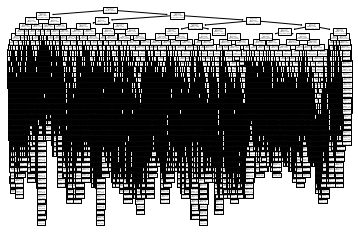

In [58]:
plot_tree(model)

In [220]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

Accuracy =  0.941371965049999


In [221]:
print(classification_report(y_test, prediction_test))


              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94     50701
         1.0       0.90      1.00      0.94     50701

    accuracy                           0.94    101402
   macro avg       0.95      0.94      0.94    101402
weighted avg       0.95      0.94      0.94    101402



# BUILDING A PREDICTIVE SYSTEM 

In [233]:
input_data = (1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,18.0,15.0,1.0,0.0,45.0,4.0,3.0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = RF.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0.]
The Person does not have a Heart Disease


# saving our model

In [239]:
import pickle 

In [240]:
filename = "model_Heart_prediction.sav"
pickle.dump(RF, open(filename, 'wb'))

In [241]:
load_model = pickle.load(open("model_Heart_prediction.sav", 'rb'))

In [242]:
#to make sure that the model was saved successfully
print ( load_model.predict(x_train))


[1. 0. 1. ... 0. 0. 1.]


# Building a Predictive System

In [238]:
input_data = (1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,5.0,18.0,15.0,1.0,0.0,45.0,4.0,3.0)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = load_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0.]
The Person does not have a Heart Disease
